### Statistical Analysis of Fire Intensity Model (Clean) Data Set

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
import matplotlib.mlab as mlab
import matplotlib.style as stl
import matplotlib.image as mpimg
from numpy import median
from numpy.random import randn
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

sns.set(style="ticks", color_codes=True)

%matplotlib inline

### Second Step - Loading and Checking the Data - Limiting Sample

In [2]:
# Load Fire Intensity Model CSV File
emstat = pd.read_csv('FireIntensity_Model_June12_Clean.csv').sample(250000)

In [3]:
# Use pandas to view the first 5 rows of the file
emstat.head(5)

,Unnamed: 0,latitude,longitude,doy,month,year,cluster_reference,fire_region,season,covertype,...,visibility,wind_speed,wind_gust,brightness,fire_intensity,fire_intensity_twocat,fire_intensity_threecat,fire_intensity_fourcat,bright_t31,frp
677227,677227,47.7948,-111.5436,148,5,2009,2009_8092,1,0,3,...,9.216293,9.81,16.880000,353.7,Severe,Moderate,Low,Moderate,307.5,70.2
573145,573145,32.6926,-81.3541,184,7,2008,2008_5964,2,1,3,...,9.216293,4.85,10.150000,322.3,High,Moderate,Low,Low,302.5,13.0
731467,731467,30.4798,-95.8667,89,3,2010,2010_99,3,0,3,...,9.997000,5.53,11.030000,309.7,Low,Moderate,Low,Low,298.3,5.9
11512,11512,37.9331,-94.7262,85,3,2003,2003_4475,3,0,1,...,9.997000,6.91,11.681998,310.7,Medium,Moderate,Low,Low,293.0,15.5
194927,194927,40.8696,-89.6089,94,4,2005,2005_8246,0,0,1,...,9.997000,8.99,14.490000,320.6,High,Moderate,Low,Low,302.1,13.4


In [4]:
# What are the dtypes of the columns?
emstat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 677227 to 97088
Data columns (total 26 columns):
Unnamed: 0                 250000 non-null int64
latitude                   250000 non-null float64
longitude                  250000 non-null float64
doy                        250000 non-null int64
month                      250000 non-null int64
year                       250000 non-null int64
cluster_reference          250000 non-null object
fire_region                250000 non-null int64
season                     250000 non-null int64
covertype                  250000 non-null int64
fuelcode                   250000 non-null int64
prefire_fuel               250000 non-null float64
fuel_moisture_class        250000 non-null int64
temperature                250000 non-null float64
humidity                   250000 non-null float64
precip_intensity           250000 non-null float64
visibility                 250000 non-null float64
wind_speed                 250000 non

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emstat.shape))

250000 instances with 26 features



In [6]:
# Checking to see how many years comprise the file
print(emstat['year'].unique())

[2009 2008 2010 2003 2005 2006 2004 2015 2011 2012 2014 2013 2007]


In [7]:
# Reduce columns to focus on most important features
emstat = emstat.drop(columns=['Unnamed: 0','visibility','precip_intensity','fuel_moisture_class','doy','fire_region'])

In [8]:
emstat.shape

(250000, 20)

### Description of Top-Level Key Statistics

In [9]:
# Use pandas to get the summary statistics on the data
emstat.describe()

,latitude,longitude,month,year,season,covertype,fuelcode,prefire_fuel,temperature,humidity,wind_speed,wind_gust,brightness,bright_t31,frp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,37.058759,-99.428260,6.575004,2009.040524,1.330052,2.346840,831.150296,3851.271343,69.998719,0.411332,6.360940,11.670492,323.886092,295.853961,58.675586
std,5.851442,13.987184,3.052213,3.659204,1.046404,0.879651,710.581766,3007.829257,14.994639,0.168503,4.145792,6.049071,22.233539,9.534313,180.914848
min,24.546400,-124.632500,1.000000,2003.000000,0.000000,1.000000,1.000000,19.615050,-28.970000,0.020000,0.000000,0.000000,300.000000,264.500000,0.000000
25%,32.388100,-114.147975,4.000000,2006.000000,0.000000,1.000000,1.000000,320.565960,60.650000,0.290000,3.550000,7.450000,309.800000,290.200000,10.200000
50%,35.913750,-96.233250,7.000000,2009.000000,1.000000,3.000000,1160.000000,4335.068543,70.410000,0.400000,5.410000,10.860000,317.900000,295.500000,20.400000
75%,41.633700,-87.820250,9.000000,2012.000000,2.000000,3.000000,1280.000000,6989.973251,79.570000,0.530000,8.100000,14.390000,330.300000,300.800000,47.300000
max,48.992200,-67.131200,12.000000,2015.000000,3.000000,3.000000,2950.000000,13337.510830,126.500000,1.000000,66.300000,85.990000,506.500000,400.100000,13174.000000


### Identifying Most Important Features

In [10]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 3 (highest)
emstat['covertype'].value_counts()

3    155115
1     68405
2     26480
Name: covertype, dtype: int64

In [11]:
# Show the data by cover type
print(emstat.groupby('covertype').count())

           latitude  longitude   month    year  cluster_reference  season  \
covertype                                                                   
1             68405      68405   68405   68405              68405   68405   
2             26480      26480   26480   26480              26480   26480   
3            155115     155115  155115  155115             155115  155115   

           fuelcode  prefire_fuel  temperature  humidity  wind_speed  \
covertype                                                              
1             68405         68405        68405     68405       68405   
2             26480         26480        26480     26480       26480   
3            155115        155115       155115    155115      155115   

           wind_gust  brightness  fire_intensity  fire_intensity_twocat  \
covertype                                                                 
1              68405       68405           68405                  68405   
2              26480       2

In [12]:
# These features all increase with each other - no inverse relationships
emstat[['wind_speed', 'wind_gust', 'brightness']].agg(['mean','min','max'])

,wind_speed,wind_gust,brightness
mean,6.36094,11.670492,323.886092
min,0.00000,0.000000,300.000000
max,66.30000,85.990000,506.500000


### Fire Intensity Categories Measured Against Data Set Features

In [13]:
# Show the data by fire_intensity 
print(emstat.groupby('fire_intensity').count())

                latitude  longitude  month   year  cluster_reference  season  \
fire_intensity                                                                 
High               62878      62878  62878  62878              62878   62878   
Low                62604      62604  62604  62604              62604   62604   
Medium             61737      61737  61737  61737              61737   61737   
Severe             62781      62781  62781  62781              62781   62781   

                covertype  fuelcode  prefire_fuel  temperature  humidity  \
fire_intensity                                                             
High                62878     62878         62878        62878     62878   
Low                 62604     62604         62604        62604     62604   
Medium              61737     61737         61737        61737     61737   
Severe              62781     62781         62781        62781     62781   

                wind_speed  wind_gust  brightness  fire_intens

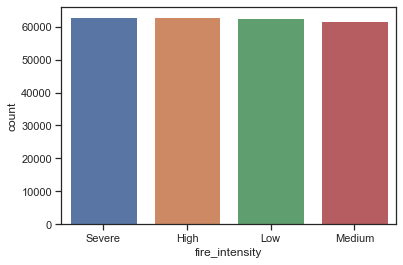

In [14]:
# Fire Intensity by category
sns.countplot(emstat['fire_intensity'],label="Count")
plt.show()

### Looking at Histograms illustrating key Fire Intensity features

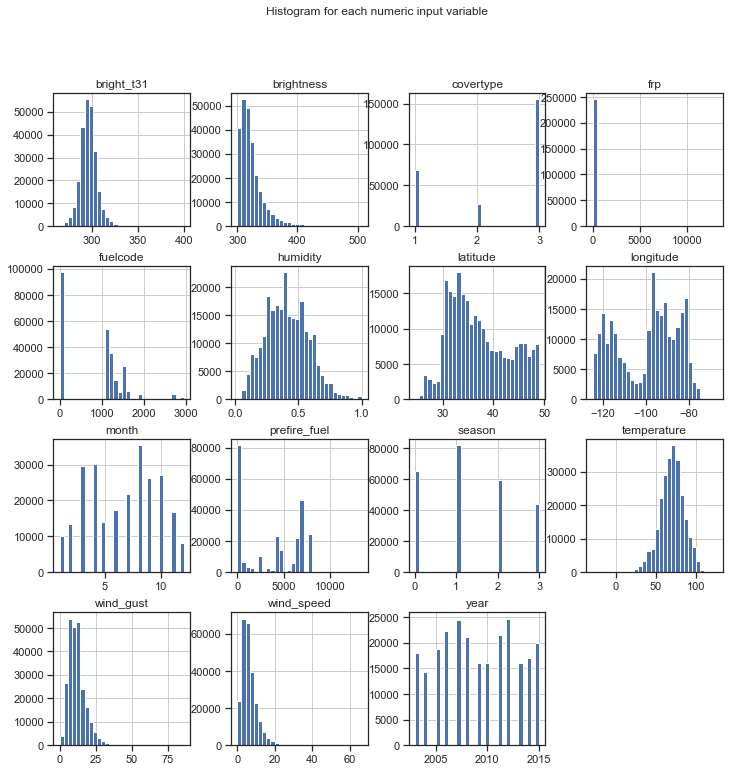

In [15]:
# Historgram of all numerical data
emstat.hist(bins=30, figsize=(12,12))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

### Limiting the dataset again - this time within the state of California for processing efficiency
#### * This step reduces the number of instances from 250,000 to 61,234 

In [16]:
# Limiting data to state of California
emstat_west = emstat[(emstat.latitude > 34) & (emstat.longitude < -114)]

In [17]:
# Did we reduce the size of the data?
emstat_west.shape

(61222, 20)

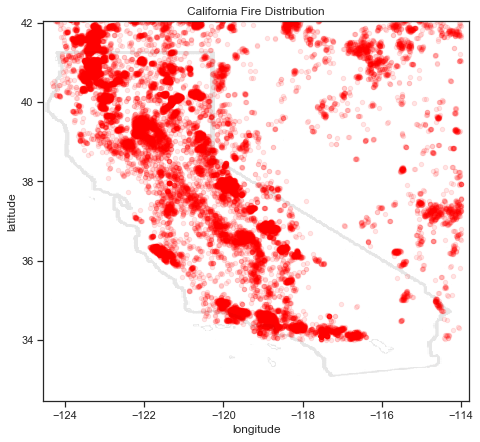

In [18]:
# California Fire Distribution Map

california_img=mpimg.imread('CaliforniaMapOutline.gif')
emstat_west.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Distribution') 
plt.show()

### Part 1 Pair Plot: Showing pairwise relationships between three select primary features

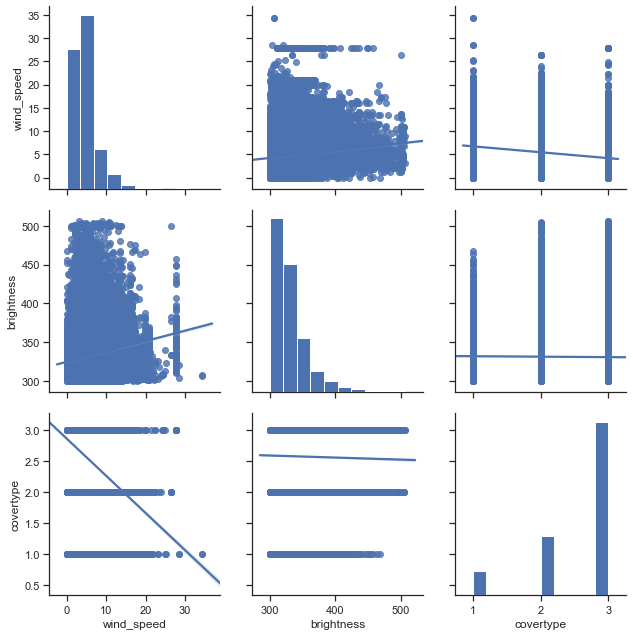

In [19]:
# Pairplot Analysis Part 1
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','brightness','covertype'], kind="reg")

### Part 2 Pair Plot: Showing pairwise relationships between three select primary features

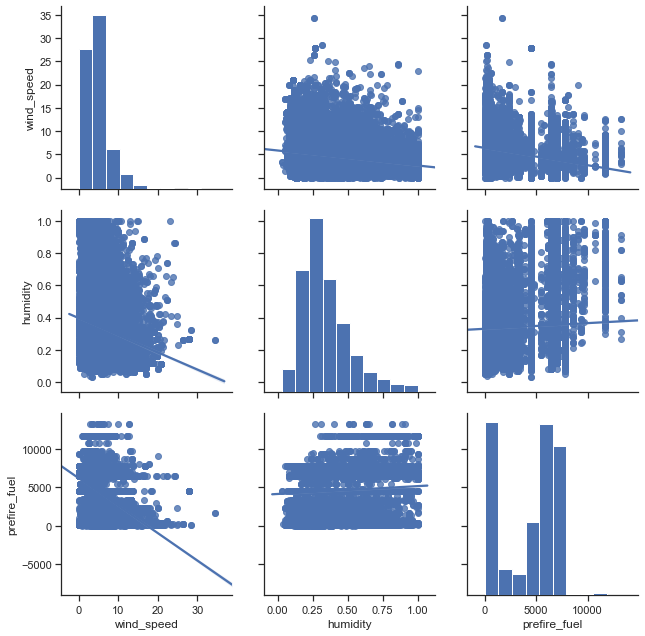

In [20]:
# Pairplot Analysis Part 2
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','prefire_fuel'], kind="reg")

### Statistical Correlation of Fire Intensity Measures of Performance

#### * The group indicated that humidity, wind speed, prefire-fuel, brightness, and cover type are the preferred features

In [21]:
# Correlation Analysis of key intensity indicators part 1
x_values = emstat_west['humidity']
y_values = emstat_west['wind_speed']
z_values = emstat_west['prefire_fuel']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of humidity and windspeed: {r_squared1:.9f}")
print(f"R2 Correlation of humidity and prefire_fuel: {r_squared2:.9f}")
print(f"R2 Correlation of wind_speed and prefire_fuel: {r_squared3:.9f}")

R2 Correlation of humidity and windspeed: 0.034253454
R2 Correlation of humidity and prefire_fuel: 0.003573967
R2 Correlation of wind_speed and prefire_fuel: 0.132099088


In [22]:
# Correlation Analysis of key intensity indicators part 2
x_values = emstat_west['covertype']
y_values = emstat_west['brightness']
z_values = emstat_west['wind_speed']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of covertype and brightness: {r_squared1:.9f}")
print(f"R2 Correlation of covertype and wind_speed: {r_squared2:.9f}")
print(f"R2 Correlation of brightness and wind_speed: {r_squared3:.9f}")

R2 Correlation of covertype and brightness: 0.000198188
R2 Correlation of covertype and wind_speed: 0.076497996
R2 Correlation of brightness and wind_speed: 0.021096036


### Visualizing the distribution with three Kernal Density Estimates

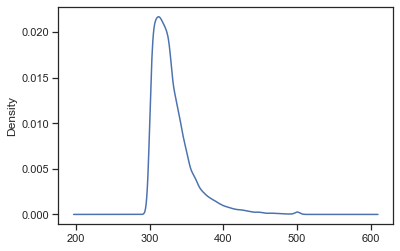

In [23]:
emstat_west['brightness'].plot(kind='kde')

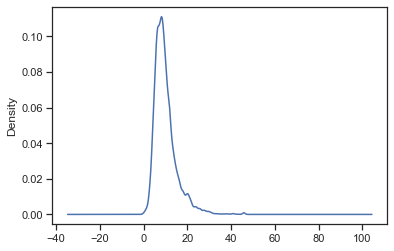

In [24]:
emstat_west['wind_gust'].plot(kind='kde')

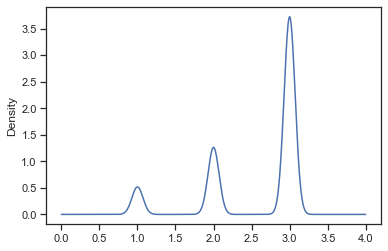

In [25]:
emstat_west['covertype'].plot(kind='kde')

### Scatter Plot Matrix to show multiple visualizations between fire intensity features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002649BB0A2C8>,
      dtype=object)

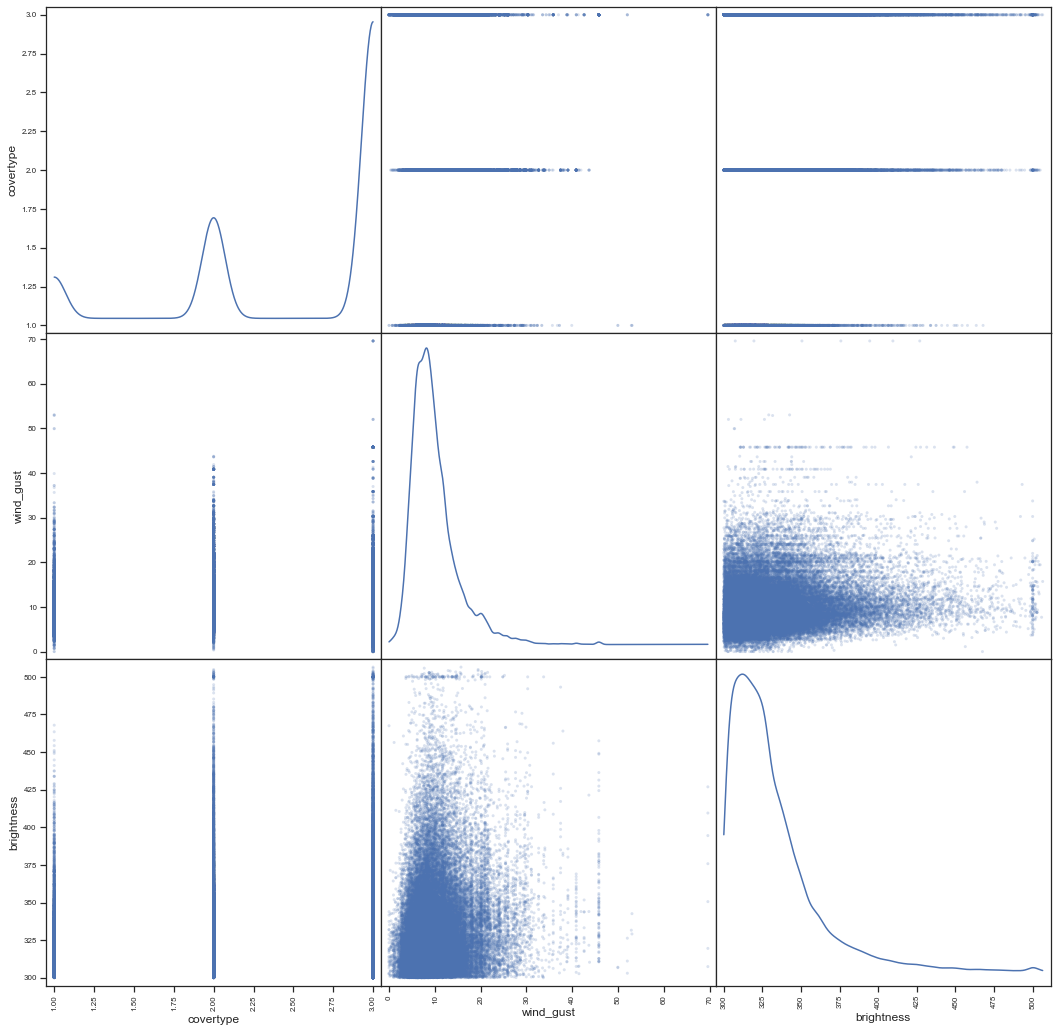

In [26]:
areas = emstat_west[['covertype','wind_gust','brightness']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Following Joint Plot shows pairwise relationships between two alternating features

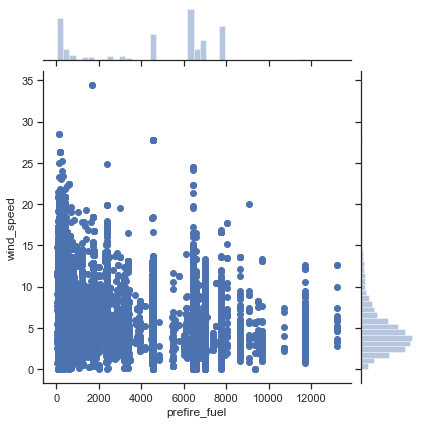

In [27]:
g = sns.jointplot("prefire_fuel", "wind_speed", emstat_west)

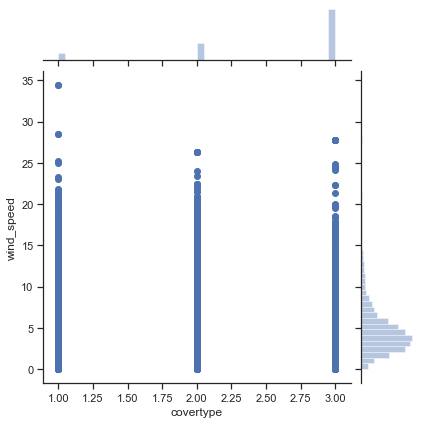

In [28]:
g = sns.jointplot("covertype", "wind_speed", emstat_west)

### Following Regression Plot shows multivariate relationships between pairings of the dataset features

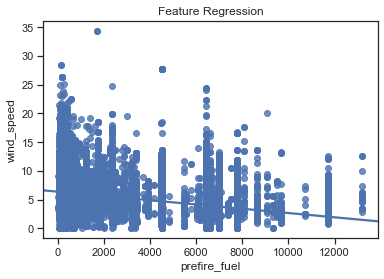

In [29]:
sns.regplot(x="prefire_fuel", y="wind_speed", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

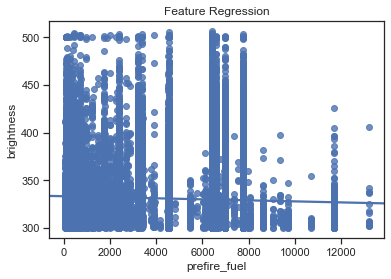

In [30]:
sns.regplot(x="prefire_fuel", y="brightness", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()